In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.gridspec as gridspec
from imblearn.over_sampling import SMOTE
import numpy as np
import sklearn

In [22]:
#Loading data
rawData = pd.read_csv("/Users/philiprundall/Python/Econ_412 /Project_1/creditcard.csv")
rawData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Classes


Text(0, 0.5, '')

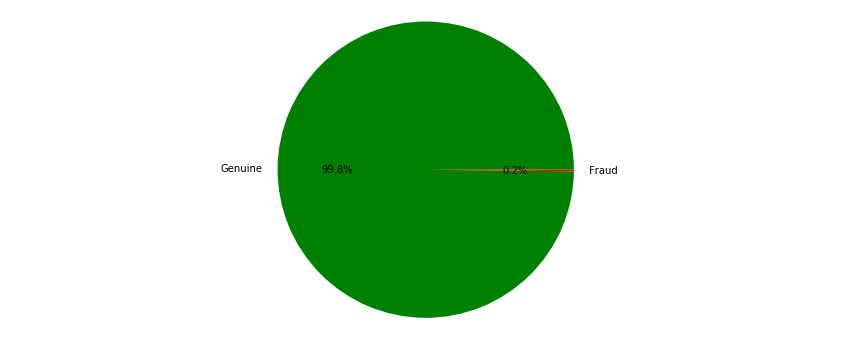

In [23]:
#Pie Chart of Fraud and Genuine transactions
print("Classes")
fig, ax = plt.subplots(1, 1)
ax.pie(rawData.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','r'])
plt.axis('equal')
plt.ylabel('')

In [24]:
#Creating new dataframe
data = rawData

In [25]:
#Splitting to training and test data
train, test = train_test_split(data,test_size=0.33, random_state=42)

Beginning feature selection

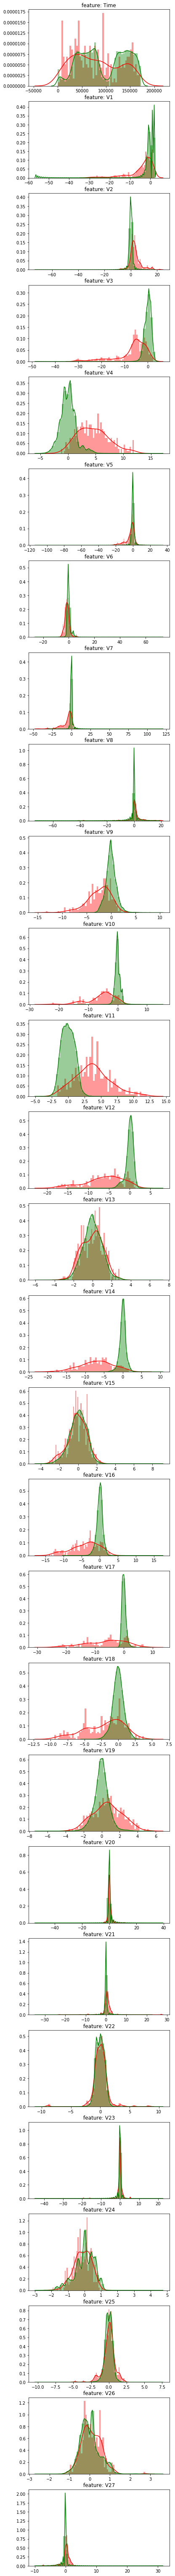

In [26]:
#Plotting distributions of Fraudulent and Genuine charges for every feature
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(train[train.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(train[col][train.Class == 1], bins=50, color='r')
    sns.distplot(train[col][train.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

Variables to be dropped:
V5
V6
V7
V8
V13
V15
V20
V21
V22
V23
V24
V25
V27

In [27]:
#Dropping Features
train = train.drop(['V5'],axis=1)
train = train.drop(['V6'],axis=1)
train = train.drop(['V7'],axis=1)
train = train.drop(['V8'],axis=1)
train = train.drop(['V13'],axis=1)
train = train.drop(['V15'],axis=1)
train = train.drop(['V20'],axis=1)
train = train.drop(['V21'],axis=1)
train = train.drop(['V22'],axis=1)
train = train.drop(['V23'],axis=1)
train = train.drop(['V24'],axis=1)
train = train.drop(['V25'],axis=1)
train = train.drop(['V27'],axis=1)

test = test.drop(['V5'],axis=1)
test = test.drop(['V6'],axis=1)
test = test.drop(['V7'],axis=1)
test = test.drop(['V8'],axis=1)
test = test.drop(['V13'],axis=1)
test = test.drop(['V15'],axis=1)
test = test.drop(['V20'],axis=1)
test = test.drop(['V21'],axis=1)
test = test.drop(['V22'],axis=1)
test = test.drop(['V23'],axis=1)
test = test.drop(['V24'],axis=1)
test = test.drop(['V25'],axis=1)
test = test.drop(['V27'],axis=1)

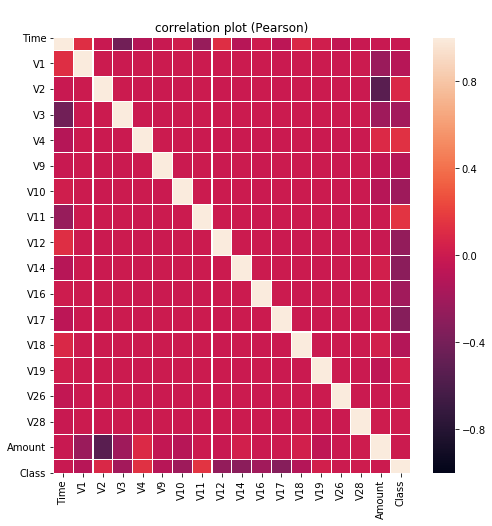

In [28]:
#Plotting Correllation of kept features
var = ['Time', 'V1', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V26', 'V28', 'Amount', 'Class']

plt.figure(figsize = (8,8))
plt.title('\ncorrelation plot (Pearson)')
corr = data[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

In [29]:
#Splitting data into features and labels
X_train = train.values
X_train = np.delete(X_train, -1, 1) 
Y_train = train[['Class']].values

X_test = test.values
X_test = np.delete(X_test, -1, 1) 

In [30]:
X_train.shape

(190820, 17)

In [31]:
#X_resampled and Y_resampled is our training dataset using SMOTE resampling (I'll write about this in the report)
#We do not resample the testing dataset
method = SMOTE(random_state=42)
x_resampled, y_resampled = method.fit_sample(X_train, Y_train)

Text(0, 0.5, '')

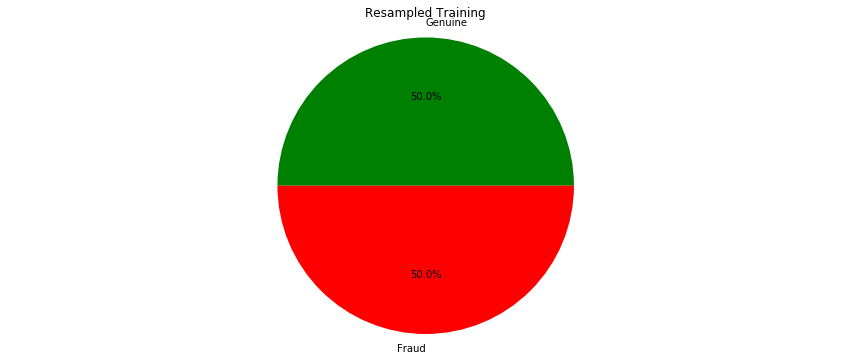

In [32]:
#After resample, distribution of training set
ig, ax = plt.subplots(1, 1)
ax.pie((len(y_resampled[y_resampled == 0]),len(y_resampled[y_resampled == 1])),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','r'])
plt.title("Resampled Training")
plt.axis('equal')
plt.ylabel('')

In [33]:
print("Observations in raw training set = ", np.shape(X_train)[0])
print("Observations in resampled training set = ", np.shape(x_resampled)[0])

Observations in raw training set =  190820
Observations in resampled training set =  380954


In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
#Fitting model and predicting on test data
GNBmodel = GaussianNB()
GNBmodel.fit(x_resampled,y_resampled)

predictions = GNBmodel.predict(X_test)

In [36]:
#Confusion Matrix Calculations
#predicted value on top
#actual value on left
conmat = sklearn.metrics.confusion_matrix(Y_test, predictions)
pd.DataFrame(conmat)

,0,1
0,93397,441
1,31,118


In [37]:
print("Correctly identified Fraud: ", conmat[1,1])
print("Correctly identified Genuine: ", conmat[0,0])
print("Falsely identified Fraud: ", conmat[0,1])
print("Falsely identified Genuine: ", conmat[1,0])

Correctly identified Fraud:  118
Correctly identified Genuine:  93397
Falsely identified Fraud:  441
Falsely identified Genuine:  31


In [38]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [39]:
#10 fold cross validaiton ROC AUC score
cross_val_score(GNBmodel, x_resampled, y_resampled, scoring='roc_auc', cv=10).mean()

0.982928834690569

In [40]:
#Calculation ROC AUC Score
y_score = GNBmodel.predict_proba(X_test)
fpr_gnb, tpr_gnb, thresholds_gnb = sklearn.metrics.roc_curve(Y_test, y_score[:,1])
roc_auc = sklearn.metrics.auc(fpr_gnb, tpr_gnb)

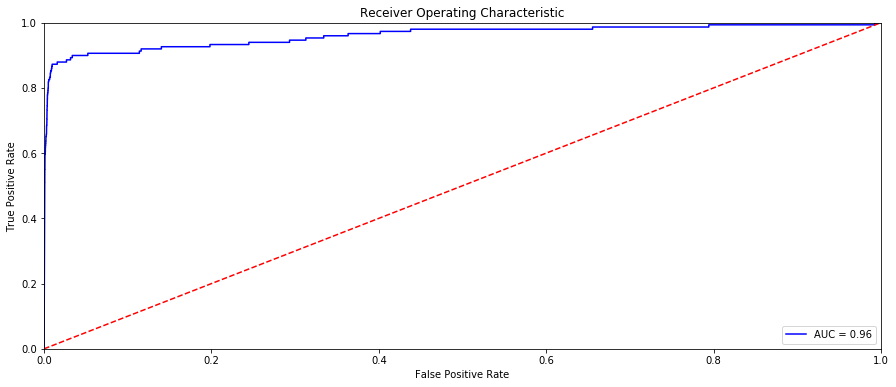

In [41]:
#Plotting ROC AUC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gnb, tpr_gnb, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

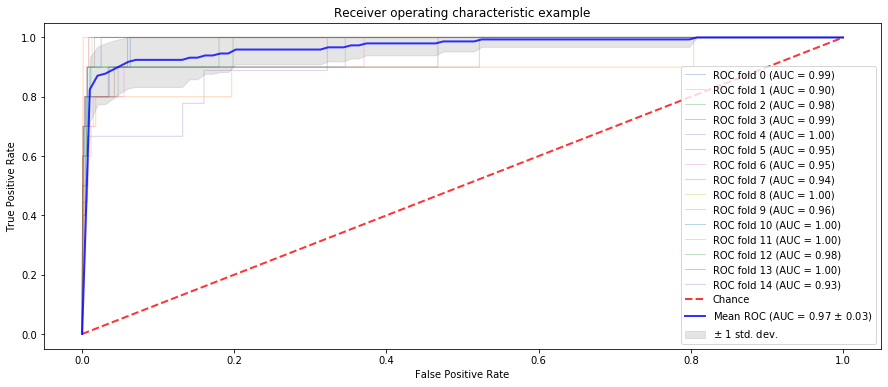

In [42]:
#Plotting 15 cross fold validation ROC AUC Score
plt.rcParams["figure.figsize"] = (15,6)
(X,y) = x_resampled,y_resampled
Y_test.reshape(1,93987)[0]
Y_test = Y_test.reshape(1,93987)[0]
plt.rcParams["figure.figsize"] = (15,6)


#(X,y) = x_resampled,y_resampled
(X,y) = X_test,Y_test

cv = sklearn.model_selection.StratifiedKFold(n_splits=15)
classifier = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = sklearn.metrics.plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
#ax.get_legend().remove()

plt.show()